In [30]:
import requests,os,time
from tqdm import tqdm_notebook as tqdm
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from tqdm import tqdm_notebook as tqdm

In [59]:
# Data = pd.read_csv('https://github.com/mathiasbruun/SDS19-Exam-Project/blob/master/Data_2018_csv.zip')
url = 'https://github.com/mathiasbruun/SDS19-Exam-Project/raw/master/Data_2018_csv.zip'
Data = pd.read_csv(url, compression='zip')

C:\Users\Frederik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [61]:
Data.columns

Index(['age_range', 'datetime', 'gender', 'involved_person', 'legislation',
       'location', 'object_of_search', 'officer_defined_ethnicity',
       'operation', 'operation_name', 'outcome',
       'outcome_linked_to_object_of_search', 'outcome_object',
       'removal_of_more_than_outer_clothing', 'self_defined_ethnicity', 'type',
       'Force'],
      dtype='object')

In [62]:
Data['datetime'] = pd.to_datetime(Data['datetime'])
Data.set_index('datetime', drop = True, inplace=True)
Data.head()

,age_range,gender,involved_person,legislation,location,object_of_search,officer_defined_ethnicity,operation,operation_name,outcome,outcome_linked_to_object_of_search,outcome_object,removal_of_more_than_outer_clothing,self_defined_ethnicity,type,Force
datetime,,,,,,,,,,,,,,,,
2018-01-14 02:01:06+00:00,25-34,Male,True,Misuse of Drugs Act 1971 (section 23),NaN,Controlled drugs,Other,NaN,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",False,NaN,Person search,avon-and-somerset
2018-01-04 16:12:02+00:00,25-34,Male,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.015226', 'street': {'id': 530...",Controlled drugs,White,NaN,NaN,NaN,NaN,"{'id': '', 'name': ''}",False,NaN,Person search,avon-and-somerset
2018-01-04 23:23:30+00:00,18-24,Female,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.458913', 'street': {'id': 543...",Controlled drugs,White,NaN,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",False,White - English/Welsh/Scottish/Northern Irish/...,Person search,avon-and-somerset
2018-01-04 23:23:30+00:00,10-17,Male,True,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.458913', 'street': {'id': 543...",Controlled drugs,Black,NaN,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",False,NaN,Person search,avon-and-somerset
2018-01-05 00:26:23+00:00,10-17,Male,True,Misuse of Drugs Act 1971 (section 23),NaN,Controlled drugs,White,NaN,NaN,False,NaN,"{'id': 'nothing', 'name': 'Nothing found - No ...",False,Other ethnic group - Any other ethnic group,Person search,avon-and-somerset


In [137]:
Data['year'] = Data.index.year
Data['month'] = Data.index.month

In [140]:
Data.groupby('month')['gender'].value_counts()

SyntaxError: invalid syntax (<ipython-input-140-0a88e1179be8>, line 8)

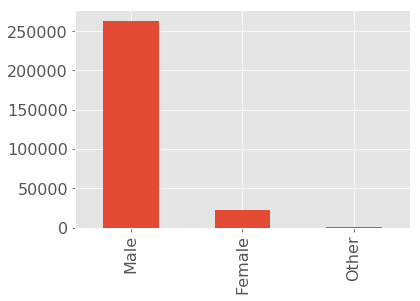

In [148]:
Data['gender'].value_counts().plot(kind='bar', stacked=True)